<a href="https://colab.research.google.com/github/Wattsy2020/DeepLearningA1/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COMP5329 Assignment 1

Team Member
- Mirope Yuhao Hu, SID: 470139936
- Sean Hongbo Du,	SID: 500635346
- Liam Watts, SID: 510562348


### Liam Watts: 1, 2, 6 - More than 1 hidden layer, ReLU Activation, Softmax output layer and cross entroppy loss
### Mirope: 4, 3, 8 - Momentum in SGD, weight decay, batch normalization
### Sean: 5, 7, 0 - dropout, mini-batch training, data preprocess

## How to run the code

## All necessary Imports

__NOT__ allowed:
1. use Deep Learning frameworks (e.g. PyTorch, Tensorflow, Caffe, and KERAS)
2. any kinds of auto-grad tools (e.g. autograd)
3. sklearn

In [1]:
import numpy as np
import numpy.random as random

import pandas as pd
import matplotlib.pyplot as plt
import random

## Data Loading/Preprocessing

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load data -> subject to change for the final version
dir_name = '/content/drive/MyDrive/Colab Notebooks/COMP5329/Ass1/Assignment1-Dataset/'

test_data = np.load(dir_name + 'test_data.npy')
test_label = np.load(dir_name + 'test_label.npy')
train_data = np.load(dir_name + 'train_data.npy')
train_label = np.load(dir_name + 'train_label.npy')

print('Shape of original train data is:\t', train_data.shape,
      '\nShape of original train label is:\t', train_label.shape,
      '\nShape of original test data is:\t\t', test_data.shape,
      '\nShape of original test label is:\t', test_label.shape )

# print('\nAll labels are:\t\t', list(np.unique(test_label)))

# # preprocessing: normalization might be unnecessary
# # test_x = Normalizer().fit_transform(test_data)
# # train_x = Normalizer().fit_transform(train_data)

# one hot encoding the labels set 
def oneHot_encoder(data_label):
    '''returns the labels in one hot encoders'''
    encoded = list()
    for value in data_label:
        label_onehot = [0 for index in range(10)]
        label_onehot[int(value)] = 1
        encoded.append(label_onehot)
    return np.array(encoded)


test_x = test_data
train_x = train_data
test_y = oneHot_encoder(test_label)
train_y = oneHot_encoder(train_label)

print('\nShape of transformed train label is:\t', train_y.shape,
      '\nShape of transformed train label is:\t', test_y.shape )

Shape of original train data is:	 (50000, 128) 
Shape of original train label is:	 (50000, 1) 
Shape of original test data is:		 (10000, 128) 
Shape of original test label is:	 (10000, 1)

Shape of transformed train label is:	 (50000, 10) 
Shape of transformed train label is:	 (10000, 10)


(array([5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000., 5000.,
        5000.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

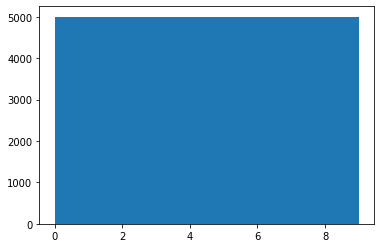

In [ ]:
# IS THIS MNIST? This seems like a version of mnist that has been cropped and/or compressed, potentially to 16x8 px format
# 50000 train and 10000 test data
# 10 labels (1 for each digit)
# Equal Distribution of labels
plt.hist(train_label, bins=10)

Plot of image 29462


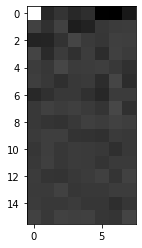

In [ ]:
i = int(np.random.rand(1)[0]*50000)
example = train_x[i].reshape(16, 8)
print("Plot of image {}".format(i))
plt.imshow(example, cmap="gray")

## Data Preprocessing



Data were normalized via dividing by the maximum positive number in the column.  

To visualize the dataset, the test data were transformed from (10000, 128) to (10000, 2, 64). According to the scatter plot of the nine classes, there is not much differences of the scatter plots between the classes. 

In [ ]:
# data normalization: [-1, 1]
def normalization(dataset):
    '''returns the normalized data'''
    numer = dataset - dataset.min(axis = 0)
    denom = dataset.max() - dataset.min()
    return numer/denom

# normalize the datasets
norm_train_data = normalization(train_data).transpose()
norm_test_data = normalization(test_data).transpose()

# reframe labels as DataFrame and renaming  
train_label_df = pd.DataFrame(train_label).rename(columns={0: "class"})
test_label_df = pd.DataFrame(test_label).rename(columns={0: "class"})

# combining data and labels as DataFrame
train_df = pd.concat([pd.DataFrame(norm_train_data), train_label_df.transpose()], axis=0).transpose()
test_df = pd.concat([pd.DataFrame(norm_test_data), test_label_df.transpose()], axis=0).transpose()


def pca_analysis(input_dat, num_components):
    '''returns the principal component analysis given the input data according to the number of components'''
    dat_mean = np.mean(input_dat, axis=0)
    # calculate the covariance matrix
    cov_matrix = np.cov(input_dat - dat_mean, rowvar=False)
    # calculation and manipulation on the eigens
    eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
    eigenvectors = eigenvectors.transpose()
    sorted_components = np.argsort(eigenvalues)[::-1]
    # calculate the projection matrix
    proj_matrix = eigenvectors[sorted_components[:num_components]]
    return np.dot(input_dat - dat_mean, proj_matrix.transpose())

No handles with labels found to put in legend.


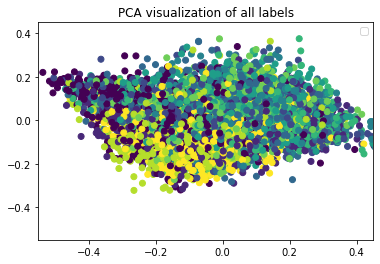

In [ ]:
# Plot of the PCA of all classes
pca = pca_analysis(test_df[test_df.columns[0:128]], 2)
plt.figure()
plt.scatter(pca[:, 0], pca[:, 1], c=test_df['class'])
plt.xlim(-0.55, 0.45)
plt.ylim(-0.55, 0.45)
plt.title("PCA visualization of all labels")
plt.legend()

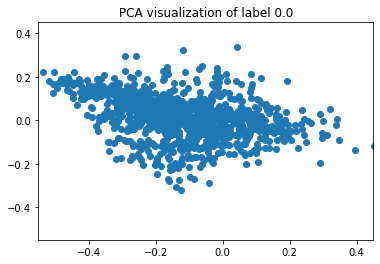

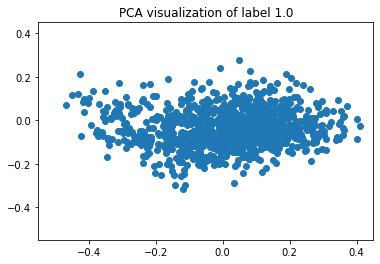

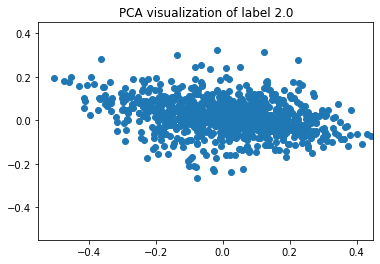

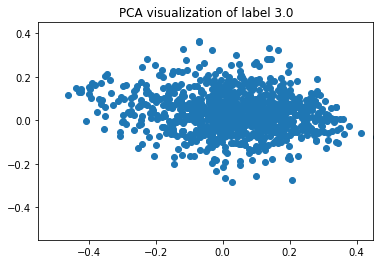

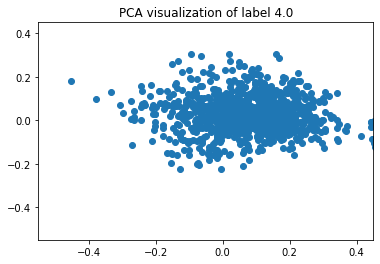

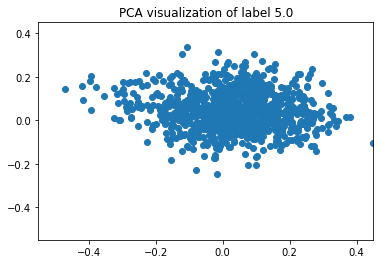

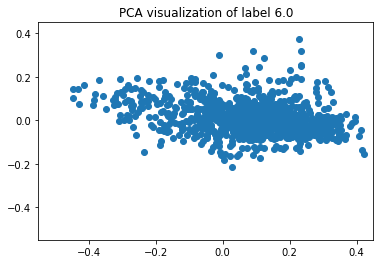

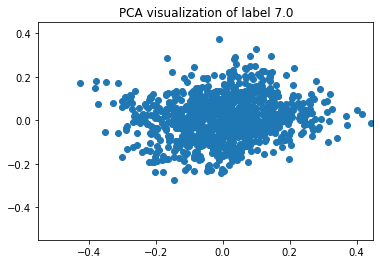

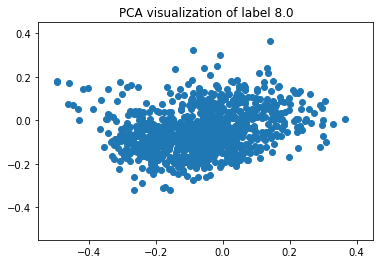

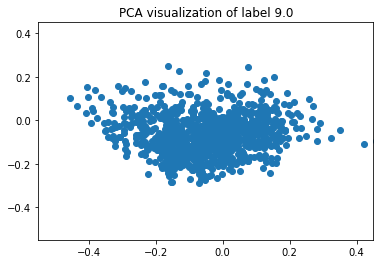

In [ ]:
# Plot of individual classes with the same PCA and equal chart scale
for num in [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]:
    data_pca = pca[test_df['class'] == num]
    plt.figure()
    plt.scatter(data_pca[:, 0], data_pca[:, 1])
    plt.title("PCA visualization of label {}".format(num))
    
    plt.xlim(-0.55, 0.45) # keep the scale the same for an equal comparison
    plt.ylim(-0.55, 0.45) # also keep scale the same for both axes
    plt.show()

## Algorithms / Structures

__Requirements__
1. More than one hidden layer (Liam: 100%)
2. ReLU activation (Liam: 100%)    Checked
3. Weight decay (Mirope: 100%)     Checked
4. Momentum in SGD (Mirope: 100%)  Checked
5. Dropout (Sean: 0%)
6. Softmax and cross-entropy (Liam: 100%) Checked
7. Mini-batch training (Liam: 100%)       Checked
8. Batch Normalization (Mirope: 100%)

In this part, try to implement each layer/optimiser/function as modules

In [4]:
from abc import ABCMeta, abstractmethod

In [59]:
# Define functions required for the Multi Layer Perceptron
def he_uniform(input_size=1, output_size=1):
    '''outputs a matrix of size (output_size, input_size) with random initialization'''
    r = np.sqrt(6/input_size)
    return np.random.uniform(-r, r, size=(output_size, input_size))

In [73]:
# define the momentum optimizer class, the optimiser is passed in to every layer so it can update it's parameters during backprop
class Momentum():
    '''
    A momentum optimizer
    Attributes:
        self.learn_rate
        self.gamma - the momentum parameter that controls the contribution of the previous gradients to current gradient
    '''
    def __init__(self, learn_rate=0.01, gamma=0.9):
        self.learn_rate = learn_rate
        self.gamma = gamma

    def __call__(self, dloss, momentum_term):
        '''calculate the weight update given the derivative of loss w.r.t. weight and previous momentum_term'''
        return self.gamma * momentum_term + self.learn_rate * dloss

In [74]:
# define the layer classes we'll use in the model, starting with an abstract base class
class layer(object, metaclass=ABCMeta):
    '''
    Base class for a layer.
    Attributes:
        self.input - the input to the layer
        self.activation - output of the layer (activation and input are for backprop so they can compute back propagation with only the derivative of loss w.r.t. their output)
        layers should define momentum attributes themselves

    Layers must define
        forward(X, train=True): a feed forward function that both returns output and stores it in self.activation. If train=True dropout will be used, and the behaviour of batchnorm changes
        backprop(dloss, optimizer, output_dloss=True): a back propagation function, both updates the weights of the layer and (unless specificied otherwise) returns the losses for the layers inputs 
    '''
    def __init__(self):
        self.input = []
        self.activation = []
    
    @abstractmethod
    def forward(self, X, train=True):
        pass

    @abstractmethod
    def backprop(self, dloss, optimizer, output_dloss=True):
        pass

In [75]:
class linear(layer):
    '''Defines a linear layer, parameters: input size, output size, initializer'''
    def __init__(self, n_input, n_output, initializer=he_uniform, l2=0.1):
        super().__init__()
        self.l2 = l2
        self.weights = initializer(input_size=n_input, output_size=n_output)
        self.biases = np.zeros((n_output, 1))

        # store momentum terms in the layer, implementing a torch style optimizer class is infeasible
        self.w_momentum = np.zeros((n_output, n_input)) 
        self.b_momentum = np.zeros((n_output, 1))

    def forward(self, X, train=True):
        self.input = X
        self.activation = np.dot(X, self.weights.T) + self.biases.T
        return self.activation

    def backprop(self, dloss, optimizer, output_dloss=True):
        '''
        backpropagate the linear layer
        parameters:
            dloss: loss of the output (pre relu) of this layer, shape of (batch_size, layer_output_size)
            optimizer: an optimizer class, optimizer(dloss w.r.t. weights , momentum) returns the weight_change

        returns:
            dloss: loss of the output (pre relu) of the previous layer (layer i-1), so long as layer i-1 exists (i.e. i-1 >= 0)
        '''
        assert dloss is not None, "Output deltas not provided"

        # outline dimensions
        batch_size = dloss.shape[0]
        layer_output_size = dloss.shape[1]
        layer_input_size = self.input.shape[-1]
        
        # calculate gradients
        self.input = self.input.reshape(batch_size, layer_input_size) # use reshapes to assert the shape is correct, and indicate shape
        dw = np.dot(dloss.T, self.input).reshape(layer_output_size, layer_input_size)
        # the i,j entry of dw represents the dot product of:
        # the ith row of dloss.T i.e. the derivative of losses for neuron i over all samples
        # the jth column of activation i.e. the input to weight j over all samples
        # so overall: it is (dloss for neuron i * input for weight j of neuron i), giving us the derivative of loss w.r.t weight i,j
        db = np.sum(dloss.T, axis=1).reshape(layer_output_size, 1)
        # output = X*W.T + B so doutput w.r.t db is just 1, hence we only need to sum the gradients for each bias
        
        # calculate gradient of loss w.r.t output of previous layer (if there is a previous layer)
        if output_dloss:
            dloss_prev = np.dot(dloss, self.weights).reshape(batch_size, layer_input_size)
            # the i,j entry of dloss_prev represents the dot product of
            # the ith row of dloss i.e. the dlosses for the ith sample for each of this layers outputs
            # the jth column of W i.e. the jth weight for all output neurons in this layer
            # overall: the sum of (dloss of output neuron k * weight j (the weight that multiplies input j) of output neuron k for sample i)
            # which is the derivative of the loss w.r.t input j for this sample as output = X*W.T + B
        else:
            dloss_prev = None

        # update gradients, with weight decay and momentum 
        # TODO implement weight decay
        self.w_momentum = optimizer((1/batch_size) * dw + self.l2*self.weights, self.w_momentum)
        self.b_momentum = optimizer((1/batch_size) * db + self.l2*self.biases , self.b_momentum)
        self.weights -= self.w_momentum
        self.biases -= self.b_momentum

        return dloss_prev

In [76]:
# define relu and softmax as layers with no parameters, this way the model can be defined entirely with modular layers
class ReLU(layer):
    '''implements relu activation function as a layer (with no parameters)'''
    def __init__(self):
        super().__init__()

    def forward(self, X, train=True):
        self.input = X
        self.activation = np.maximum(self.input, 0)
        return self.activation

    def backprop(self, dloss, optimizer, output_dloss=True):
        '''this defines the derivative of relu at 0 as 0 to tf.nn.relu()'s standard (which ensures a sparser gradient matrix)'''
        if output_dloss:
            return (self.input > 0).astype(int) * dloss

In [77]:
class Softmax(layer):
    '''implements softmax activation function as a layer (with no parameters)'''
    def __init__(self):
        super().__init__()

    def forward(self, X, train=True):
        '''return the softmax activation of a matrix (each row vector has softmax applied to it)'''
        self.input = X
        X = np.power(np.e, X)
        total = np.sum(X, axis=1).reshape(X.shape[0], 1)
        self.activation = X/total
        return self.activation

    def backprop(self, dloss, optimizer, output_dloss=True):
        '''
        calculate derivative of softmax activation
        note this function assumes softmax is the output activation, and that dloss is the ground truth labels
        see https://peterroelants.github.io/posts/cross-entropy-softmax/ for an explanation of this derivative
        '''
        if output_dloss:
            return self.activation - dloss

In [78]:
class Dropout(layer):
    '''implements dropout as a layer (with no parameters)'''
    def __init__(self, drop_prob=0):
        super().__init__()
        self.drop_prob = drop_prob
        self.drop_vector = None # vector of 0 if neuron i is dropped, 1 if neuron i is kept

    def forward(self, X, train=True):
        '''dropout neurons, if train=True'''
        self.input = X
        if train:
            self.drop_vector = (np.random.random((X.shape[1], 1)) > self.drop_prob).astype(int) # a random uniform variable in [0, 1) is < self.drop_prob self.drop_prob % of the time
            self.activation = X*self.drop_vector.T # drop the specified neurons using broadcasting
        else:
            self.activation = X*(1 - self.drop_prob) # the paper says when not using dropout we multiply by the keep prob to keep the overall magnitude of the output the same
        return self.activation

    def backprop(self, dloss, optimizer, output_dloss=True):
        '''calculate derivative of dropout, this is just zeroing the gradients of the neurons that were dropped'''
        if output_dloss:
            return dloss * self.drop_vector.T

In [79]:
class Batchnorm(layer):
    '''implements batch normalization as a parametric layer, requires number of inputs, refer to https://arxiv.org/pdf/1502.03167.pdf for details'''
    def __init__(self, n_input, initializer=he_uniform, epsilon=0.00001, alpha=0.9):
        super().__init__()
        self.n_input = n_input
        self.gamma = np.ones((1, n_input)) # the trainable scalar parameters
        self.beta =  np.zeros((1, n_input)) # the trainable bias parameters
        self.mean =  np.zeros((1, n_input)) # minibatch (or train set) mean
        self.var  =  np.zeros((1, n_input)) # minibatch (or train set) variance
        self.epsilon = epsilon # used to prevent division by 0
        self.g_momentum = np.ones((1, n_input))
        self.b_momentum = np.zeros((1, n_input))

        # the mean and variance for the dataset, estimated using an exponential mean
        self.alpha = alpha
        self.emean = np.zeros((1, n_input))
        self.evar   = np.zeros((1, n_input))

    def forward(self, X, train=True):
        '''forward propagate, also take the exponential mean of mean and variance on the mini batches which will be used in testing'''
        self.input = X
        if train:
            # first calculate several variables, these are reused in backprop so it is useful to store them for later
            self.mean = np.mean(X, axis=0) # the mean of output of each neuron (each column is a neurons output)
            self.var = np.var(X, axis=0)
            self.invdev = np.power(self.var + self.epsilon, -1/2)
            self.inputdifmean = self.input - self.mean

            # update the estimated mean and variance of the entire dataset
            self.emean = self.alpha*self.emean + (1 - self.alpha)*self.mean
            self.evar  = self.alpha*self.evar  + (1 - self.alpha)*self.var

            # perform batchnorm
            self.xhat = (X - self.mean) * np.power(self.var + self.epsilon, -1/2)
        else:
            # perform batchnorm using the estimated mean and variance
            self.xhat = (X - self.emean) * np.power(self.evar + self.epsilon, -1/2)
        
        self.activation = self.gamma * self.xhat + self.beta
        return self.activation

    def backprop(self, dloss, optimizer, output_dloss=True):
        '''backprop, updating the gamma and beta parameters algorithm taken from https://arxiv.org/pdf/1502.03167.pdf '''
        batch_size = dloss.shape[0]

        # note d___ means derivative of loss w.r.t ___
        dxhat = (dloss * self.gamma).reshape(batch_size, self.n_input)
        dvar  = (-1/2) * np.sum(dxhat * (self.inputdifmean)*np.power(self.invdev, 3), axis=0).reshape(1, self.n_input)
        dbias = (np.sum(dxhat*-1*self.invdev, axis=0) + (-2*dvar*np.mean(self.inputdifmean, axis=0))).reshape(1, self.n_input)
        dprev = (dxhat*self.invdev + dvar*(2/batch_size)*self.inputdifmean + dbias/batch_size).reshape(batch_size, self.n_input)
        dgamma = np.sum(dloss * self.xhat, axis=0)
        dbeta = np.sum(dloss)

        # update the trainable parameters
        self.g_momentum = optimizer((1/batch_size) * dgamma, self.g_momentum)
        self.b_momentum = optimizer((1/batch_size) * dbeta, self.b_momentum)
        self.gamma -= self.g_momentum
        self.beta -= self.b_momentum

        return dprev

In [80]:
b = Batchnorm(10)
optimizer = Momentum()
data = np.random.rand(100, 10) * 100
output = b.forward(data)
np.mean(output, axis=0), np.mean(data)

(array([ 8.99280650e-17,  2.39808173e-16,  4.32986980e-17, -1.37667655e-16,
         8.41549053e-16, -5.55111512e-18, -1.22124533e-16,  4.54081217e-16,
        -4.19664303e-16, -2.24265051e-16]), 50.515521377376494)

In [81]:
print("Gamma before: ", b.gamma)
b.backprop(np.random.rand(100, 10), optimizer)
print("Gamma before: ", b.gamma)

Gamma before:  [[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
Gamma before:  [[0.10001167 0.09954655 0.10016859 0.1000147  0.10034813 0.09974091
  0.09964022 0.09960071 0.10003793 0.09956038]]


In [82]:
class MLP:
    ''' 
    Implements a Multi Layer Perceptron, including both the feed-forward phase and backward propagation
    The hidden activation is ReLU, output activation is softmax, and the loss function cross entropy
    Store all parts of the networks in self.layers: an array of Layer classes

    MLP.__init__()
        parameters:
            hidden: an array with the number of neurons for each layer
            input_size: number of inputs
            output_size: number of outputs
            output_act: the activation for the last layer, one of sigmoid or softmax
            gamma: the momentum term
        
        initializes weight matrices with shape (output_size, input_size) to match Pytorch's standard
    '''
    def __init__(self, 
                 hidden=[1], input_size=1, output_size=1, 
                 learn_rate=1e-2, weight_decay=1e-3, gamma=0.9, batch_norm=False,
                 dropout_rate=0, initializer=he_uniform): ####
        '''initialize the layers, optimizer and other hyperparameters'''
        self.batch_norm = batch_norm
        self.dropout_rate = dropout_rate
        
        self.optimizer = Momentum(learn_rate=learn_rate, gamma=gamma)

        self.layers = [] # this stores linear, activation functions, dropout and batchnorm as layers
        for i, (input_size_i, output_size_i) in enumerate(zip([input_size] + hidden, hidden + [output_size])):
            self.layers.append(linear(input_size_i, output_size_i, initializer=initializer, l2=weight_decay))
            if i == len(hidden): # use softmax activation in last layer
                self.layers.append(Softmax())
            else:
                self.layers.append(ReLU())
                if dropout_rate > 0:
                    self.layers.append(Dropout(drop_prob=dropout_rate))
                if batch_norm: # we use batchnorm after the activation to encourage sparseness
                    self.layers.append(Batchnorm(output_size_i, initializer=initializer))
    
    def forward(self, X, train=True):
        '''
        calculate output of the network
        
        parameters:
            X: the input matrix of shape (batch_size, input_size)
            train: if True the model will use dropout, also affects batchnorm

        returns:
            yhat: the prediction matrix of shape (batch_size, output_size)
        '''
        for layer in self.layers:
            X = layer.forward(X, train=train)
        return X

    def backprop(self, y):
        '''given the true outputs y perform one step of gradient descent using the predictions of the current batch as yhat'''
        dloss = y # the softmax layer expects the ground truth to be passed in
        for layer in reversed(self.layers[1:]): # backprop until the first layer
            dloss = layer.backprop(dloss, self.optimizer)
        layer.backprop(dloss, self.optimizer, output_dloss=False) # to save time don't calculate the loss on the training data

    def __repr__(self):
        return self.layers.__repr__()

## Testing
For overall testing we will build an easy to learn dataset and check that the MLP reaches near 100% accuracy.

In [83]:
data = np.random.random((5000, 10))
rowsum = np.sum(data, axis=1).reshape(5000, 1)
label1 = rowsum > 5
label2 = rowsum <= 5
labels = np.concatenate([label1, label2], axis=1)

In [84]:
data = np.concatenate([data, label1.astype(float)], axis=1) # perhaps random data is hard to predict after all, add the label in

In [85]:
mlp = MLP(hidden=[10, 5], input_size=11, output_size=2,
          learn_rate=0.001, weight_decay=0, dropout_rate=0, gamma=0.9, batch_norm=True)

batch_size = 32
X = data
y = labels

def accuracy(y_hat, y):
    preds = np.argmax(y_hat, axis=1)
    labels = np.argmax(y, axis=1)
    return np.mean(preds == labels)

for epoch in range(100):
    # shuffle
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices, :]
    y = y[indices, :]

    for batch in range(int(X.shape[0]/batch_size)):
        batch_x = X[batch*batch_size:(batch+1)*batch_size]
        batch_y = y[batch*batch_size:(batch+1)*batch_size]
        preds = mlp.forward(batch_x)
        mlp.backprop(batch_y)

    if epoch % 5 == 0:
        print("Epoch {:04d}\tTrain Accuracy: {:.4f}"
        .format(epoch, accuracy(mlp.forward(X), y)))

print("Epoch {:04d}\tTrain Accuracy: {:.4f}"
        .format(epoch, accuracy(mlp.forward(X, train=False), y)))

Epoch 0000	Train Accuracy: 0.9132
Epoch 0005	Train Accuracy: 0.9446
Epoch 0010	Train Accuracy: 0.9480
Epoch 0015	Train Accuracy: 0.9464
Epoch 0020	Train Accuracy: 0.9494
Epoch 0025	Train Accuracy: 0.9494
Epoch 0030	Train Accuracy: 0.9496
Epoch 0035	Train Accuracy: 0.9498
Epoch 0040	Train Accuracy: 0.9490
Epoch 0045	Train Accuracy: 0.9484
Epoch 0050	Train Accuracy: 0.9502
Epoch 0055	Train Accuracy: 0.9508
Epoch 0060	Train Accuracy: 0.9504
Epoch 0065	Train Accuracy: 0.9510
Epoch 0070	Train Accuracy: 0.9502
Epoch 0075	Train Accuracy: 0.9510
Epoch 0080	Train Accuracy: 0.9506
Epoch 0085	Train Accuracy: 0.9504
Epoch 0090	Train Accuracy: 0.9510
Epoch 0095	Train Accuracy: 0.9504
Epoch 0099	Train Accuracy: 0.9508


## Experiments

By far the most helpful method might be:

- momentum

### Stochastic gradient descent

compared to Mini-batch:

1. Slower Time (20s/epoch) & Worse Performance (5%~7% lower with the same structure & momentum) 
2. require smaller learning rate, usually 1/10

In [87]:
%%time
mlp = MLP(hidden=[128, 64], input_size=128, output_size=10,
          learn_rate=1e-3, weight_decay=1e-4, gamma=0.9)

X = train_x
y = train_y

def accuracy(y_hat, y):
    preds = np.argmax(y_hat, axis=1)
    labels = np.argmax(y, axis=1)
    return np.mean(preds == labels)

for epoch in range(20):
    # shuffle
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices, :]
    y = y[indices, :]

    for idx in range(X.shape[0]):
        preds = mlp.forward(X[idx])
        mlp.backprop(y[idx], preds)

    if epoch % 1 == 0:
        print("Epoch {:04d}\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}"
        .format(epoch, accuracy(mlp.forward(X), y), accuracy(mlp.forward(test_x), test_y)))

print('Final:\t\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}'
  .format(accuracy(mlp.forward(X), y), accuracy(mlp.forward(test_x), test_y)))

TypeError: ignored

### Mini-batch Gradient Descent

#### Without BatchNorm

This seems to have the best performance by far

In [89]:
# %%time
mlp = MLP(hidden=[128, 64], input_size=128, output_size=10,
          learn_rate=0.001, weight_decay=0., gamma=0.9, batch_norm=False)

batch_size = 256
X = train_x
y = train_y

def accuracy(y_hat, y):
    preds = np.argmax(y_hat, axis=1)
    labels = np.argmax(y, axis=1)
    return np.mean(preds == labels)

for epoch in range(20):
    # shuffle
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices, :]
    y = y[indices, :]

    for batch in range(int(X.shape[0]/batch_size)):
        batch_x = X[batch*batch_size:(batch+1)*batch_size]
        batch_y = y[batch*batch_size:(batch+1)*batch_size]
        preds = mlp.forward(batch_x)
        mlp.backprop(batch_y)

    if epoch % 5 == 0:
        print("Epoch {:04d}\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}"
        .format(epoch, accuracy(mlp.forward(X), y), accuracy(mlp.forward(test_x), test_y)))

print('Final:\t\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}'
  .format(accuracy(mlp.forward(X), y), accuracy(mlp.forward(test_x, train=False), test_y)))

Epoch 0000	Train Accuracy: 0.2214	Test Accuracy: 0.2133
Epoch 0005	Train Accuracy: 0.3266	Test Accuracy: 0.3229
Epoch 0010	Train Accuracy: 0.3532	Test Accuracy: 0.3488
Epoch 0015	Train Accuracy: 0.3674	Test Accuracy: 0.3646
Final:		Train Accuracy: 0.3766	Test Accuracy: 0.3740


#### With BatchNorm

Surprisingly BatchNorm seems to undermine the speed (Maybe I didnt implement it right ?)

In [58]:
%%time
mlp = MLP(hidden=[128, 64], input_size=128, output_size=10,
          learn_rate=1e-2, weight_decay=1e-3, gamma=0.9, batch_norm=True)

batch_size = 256
X = train_x
y = train_y

def accuracy(y_hat, y):
    preds = np.argmax(y_hat, axis=1)
    labels = np.argmax(y, axis=1)
    return np.mean(preds == labels)

for epoch in range(50):
    # shuffle
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices, :]
    y = y[indices, :]

    for batch in range(int(X.shape[0]/batch_size)):
        batch_x = X[batch*batch_size:(batch+1)*batch_size]
        batch_y = y[batch*batch_size:(batch+1)*batch_size]
        preds = mlp.forward(batch_x)
        mlp.backprop(batch_y)

    if epoch % 5 == 0:
        print("Epoch {:04d}\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}"
        .format(epoch, accuracy(mlp.forward(X), y), accuracy(mlp.forward(test_x), test_y)))

print('Final:\t\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}'
  .format(accuracy(mlp.forward(X), y), accuracy(mlp.forward(test_x), test_y)))

Epoch 0000	Train Accuracy: 0.3333	Test Accuracy: 0.3230
Epoch 0005	Train Accuracy: 0.3752	Test Accuracy: 0.3635
Epoch 0010	Train Accuracy: 0.3985	Test Accuracy: 0.3788
Epoch 0015	Train Accuracy: 0.4130	Test Accuracy: 0.4003
Epoch 0020	Train Accuracy: 0.4194	Test Accuracy: 0.3907
Epoch 0025	Train Accuracy: 0.4320	Test Accuracy: 0.3932
Epoch 0030	Train Accuracy: 0.4361	Test Accuracy: 0.4040
Epoch 0035	Train Accuracy: 0.4381	Test Accuracy: 0.4039
Epoch 0040	Train Accuracy: 0.4462	Test Accuracy: 0.4044
Epoch 0045	Train Accuracy: 0.4393	Test Accuracy: 0.3991
Final:		Train Accuracy: 0.4642	Test Accuracy: 0.4213
CPU times: user 1min 4s, sys: 38.3 s, total: 1min 42s
Wall time: 52.8 s


#### Without BatchNorm with dropout

In [ ]:
%%time
# Without BatchNorm
# with dropout
mlp = MLP(hidden=[128, 64], input_size=128, output_size=10,
          learn_rate=1e-2, weight_decay=0, momentum=0, dropout_rate=0.2)

batch_size = 256
X = train_x
y = train_y

def accuracy(y_hat, y):
    preds = np.argmax(y_hat, axis=1)
    labels = np.argmax(y, axis=1)
    return np.mean(preds == labels)

for epoch in range(200):
    # shuffle
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices, :]
    y = y[indices, :]

    for batch in range(int(X.shape[0]/batch_size)):
        batch_x = X[batch*batch_size:(batch+1)*batch_size]
        batch_y = y[batch*batch_size:(batch+1)*batch_size]
        preds = mlp.forward(batch_x)
        mlp.backprop(batch_y, preds)

    if epoch % 5 == 0:
        print("Epoch {:04d}\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}"
        .format(epoch, accuracy(mlp.forward(X, train=False), y), accuracy(mlp.forward(test_x, train=False), test_y)))

print('Mini-batch Gradient Descent without batch normalization with dropout')
print('Final:\t\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}'
  .format(accuracy(mlp.forward(X, train=False), y), accuracy(mlp.forward(test_x, train=False), test_y)))

Epoch 0000	Train Accuracy: 0.2382	Test Accuracy: 0.2371
Epoch 0005	Train Accuracy: 0.3340	Test Accuracy: 0.3332
Epoch 0010	Train Accuracy: 0.3672	Test Accuracy: 0.3684
Epoch 0015	Train Accuracy: 0.3882	Test Accuracy: 0.3911
Epoch 0020	Train Accuracy: 0.4025	Test Accuracy: 0.4028
Epoch 0025	Train Accuracy: 0.4149	Test Accuracy: 0.4154
Epoch 0030	Train Accuracy: 0.4232	Test Accuracy: 0.4197
Epoch 0035	Train Accuracy: 0.4282	Test Accuracy: 0.4231
Epoch 0040	Train Accuracy: 0.4297	Test Accuracy: 0.4256
Epoch 0045	Train Accuracy: 0.4309	Test Accuracy: 0.4199


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: RuntimeWarning: overflow encountered in power
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


Epoch 0050	Train Accuracy: 0.3777	Test Accuracy: 0.3743
Epoch 0055	Train Accuracy: 0.1000	Test Accuracy: 0.1000
Epoch 0060	Train Accuracy: 0.1000	Test Accuracy: 0.1000
Epoch 0065	Train Accuracy: 0.1000	Test Accuracy: 0.1000
Epoch 0070	Train Accuracy: 0.1000	Test Accuracy: 0.1000
Epoch 0075	Train Accuracy: 0.1000	Test Accuracy: 0.1000
Epoch 0080	Train Accuracy: 0.1000	Test Accuracy: 0.1000
Epoch 0085	Train Accuracy: 0.1000	Test Accuracy: 0.1000
Epoch 0090	Train Accuracy: 0.1000	Test Accuracy: 0.1000
Epoch 0095	Train Accuracy: 0.1000	Test Accuracy: 0.1000
Epoch 0100	Train Accuracy: 0.1000	Test Accuracy: 0.1000
Epoch 0105	Train Accuracy: 0.1000	Test Accuracy: 0.1000


KeyboardInterrupt: ignored

# Sean's experiments


## Stochastic Gradient Descent (SGD) without dropout

In [ ]:
## Stochastic Gradient Descent (SGD)
# without dropout
%%time
mlp = MLP(hidden=[128, 64], input_size=128, output_size=10,
          learn_rate=1e-3, weight_decay=1e-4, momentum=0.9)

X = train_x
y = train_y

def accuracy(y_hat, y):
    preds = np.argmax(y_hat, axis=1)
    labels = np.argmax(y, axis=1)
    return np.mean(preds == labels)

for epoch in range(20):
    # shuffle
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices, :]
    y = y[indices, :]

    for idx in range(X.shape[0]):
        preds = mlp.forward(X[idx])
        mlp.backprop(y[idx], preds)

    if epoch % 1 == 0:
        print("Epoch {:04d}\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}"
        .format(epoch, accuracy(mlp.forward(X), y), accuracy(mlp.forward(test_x), test_y)))

print('Stochastic Gradient Descent (SGD) without dropout')
print('Final:\t\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}'
  .format(accuracy(mlp.forward(X), y), accuracy(mlp.forward(test_x), test_y)))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
Epoch 0000	Train Accuracy: 0.4083	Test Accuracy: 0.4048


KeyboardInterrupt: ignored

## Stochastic Gradient Descent (SGD) with dropout

In [ ]:
# SGD with dropout
%%time
mlp = MLP(hidden=[128, 64], input_size=128, output_size=10,
          learn_rate=1e-3, weight_decay=1e-4, momentum=0.9, dropout_rate=0.5)

X = train_x
y = train_y

def accuracy(y_hat, y):
    preds = np.argmax(y_hat, axis=1)
    labels = np.argmax(y, axis=1)
    return np.mean(preds == labels)

for epoch in range(20):
    # shuffle
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices, :]
    y = y[indices, :]

    for idx in range(X.shape[0]):
        preds = mlp.forward(X[idx])
        mlp.backprop(y[idx], preds)

    if epoch % 1 == 0:
        print("Epoch {:04d}\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}"
        .format(epoch, accuracy(mlp.forward(X), y), accuracy(mlp.forward(test_x), test_y)))

print('Stochastic Gradient Descent (SGD) with dropout')
print('Final:\t\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}'
  .format(accuracy(mlp.forward(X), y), accuracy(mlp.forward(test_x), test_y)))



KeyboardInterrupt: ignored

## Mini-batch Gradient Descent without batch normalization without dropout

In [ ]:
## Mini-batch Gradient Descent

# Without BatchNorm
# without dropout 
mlp = MLP(hidden=[128, 64], input_size=128, output_size=10,
          learn_rate=1e-2, weight_decay=1e-3, momentum=0.9)

batch_size = 256
X = train_x
y = train_y

def accuracy(y_hat, y):
    preds = np.argmax(y_hat, axis=1)
    labels = np.argmax(y, axis=1)
    return np.mean(preds == labels)

for epoch in range(50):
    # shuffle
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices, :]
    y = y[indices, :]

    for batch in range(int(X.shape[0]/batch_size)):
        batch_x = X[batch*batch_size:(batch+1)*batch_size]
        batch_y = y[batch*batch_size:(batch+1)*batch_size]
        preds = mlp.forward(batch_x)
        mlp.backprop(batch_y, preds)

    if epoch % 5 == 0:
        print("Epoch {:04d}\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}"
        .format(epoch, accuracy(mlp.forward(X), y), accuracy(mlp.forward(test_x), test_y)))

print('Mini-batch Gradient Descent without batch normalization without dropout')
print('Final:\t\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}'
  .format(accuracy(mlp.forward(X), y), accuracy(mlp.forward(test_x), test_y)))

## Mini-batch Gradient Descent with batch normalization without dropout

In [ ]:


# With BatchNorm
# without dropout

mlp = MLP(hidden=[128, 64], input_size=128, output_size=10,
          learn_rate=1e-2, weight_decay=1e-3, momentum=0.9, batch_norm=True)

batch_size = 256
X = train_x
y = train_y

def accuracy(y_hat, y):
    preds = np.argmax(y_hat, axis=1)
    labels = np.argmax(y, axis=1)
    return np.mean(preds == labels)

for epoch in range(50):
    # shuffle
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices, :]
    y = y[indices, :]

    for batch in range(int(X.shape[0]/batch_size)):
        batch_x = X[batch*batch_size:(batch+1)*batch_size]
        batch_y = y[batch*batch_size:(batch+1)*batch_size]
        preds = mlp.forward(batch_x)
        mlp.backprop(batch_y, preds)

    if epoch % 5 == 0:
        print("Epoch {:04d}\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}"
        .format(epoch, accuracy(mlp.forward(X), y), accuracy(mlp.forward(test_x), test_y)))

print('Mini-batch Gradient Descent with batch normalization without dropout')
print('Final:\t\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}'
  .format(accuracy(mlp.forward(X), y), accuracy(mlp.forward(test_x), test_y)))

## Mini-batch Gradient Descent with batch normalization with dropout

In [ ]:
# With BatchNorm
# with dropout

mlp = MLP(hidden=[128, 64, 32], input_size=128, output_size=10,
          learn_rate=1e-2, weight_decay=1e-3, gamma=0.9, dropout_rate=0.2, 
          batch_norm=True)

batch_size = 256
X = train_x
y = train_y

def accuracy(y_hat, y):
    preds = np.argmax(y_hat, axis=1)
    labels = np.argmax(y, axis=1)
    return np.mean(preds == labels)

for epoch in range(200):
    # shuffle
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    X = X[indices, :]
    y = y[indices, :]

    for batch in range(int(X.shape[0]/batch_size)):
        batch_x = X[batch*batch_size:(batch+1)*batch_size]
        batch_y = y[batch*batch_size:(batch+1)*batch_size]
        preds = mlp.forward(batch_x)
        mlp.backprop(batch_y)

    if epoch % 5 == 0:
        print("Epoch {:04d}\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}"
        .format(epoch, accuracy(mlp.forward(X), y), accuracy(mlp.forward(test_x, train=False), test_y)))

print('Mini-batch Gradient Descent with batch normalization with dropout')
print('Final:\t\tTrain Accuracy: {:.4f}\tTest Accuracy: {:.4f}'
  .format(accuracy(mlp.forward(X, train=False), y), accuracy(mlp.forward(test_x, train=False), test_y)))

Epoch 0000	Train Accuracy: 0.2147	Test Accuracy: 0.2733
Epoch 0005	Train Accuracy: 0.3017	Test Accuracy: 0.3555
Epoch 0010	Train Accuracy: 0.3431	Test Accuracy: 0.3721
Epoch 0015	Train Accuracy: 0.3448	Test Accuracy: 0.3834
Epoch 0020	Train Accuracy: 0.3318	Test Accuracy: 0.3961
Epoch 0025	Train Accuracy: 0.3632	Test Accuracy: 0.3977
Epoch 0030	Train Accuracy: 0.3796	Test Accuracy: 0.4058
Epoch 0035	Train Accuracy: 0.3779	Test Accuracy: 0.4041
Epoch 0040	Train Accuracy: 0.3625	Test Accuracy: 0.4166
Epoch 0045	Train Accuracy: 0.3625	Test Accuracy: 0.4208
Epoch 0050	Train Accuracy: 0.3683	Test Accuracy: 0.4213
Epoch 0055	Train Accuracy: 0.3884	Test Accuracy: 0.4238
Epoch 0060	Train Accuracy: 0.3697	Test Accuracy: 0.4265
Epoch 0065	Train Accuracy: 0.3487	Test Accuracy: 0.4323
Epoch 0070	Train Accuracy: 0.3559	Test Accuracy: 0.4339
Epoch 0075	Train Accuracy: 0.3683	Test Accuracy: 0.4344
Epoch 0080	Train Accuracy: 0.3741	Test Accuracy: 0.4343
Epoch 0085	Train Accuracy: 0.4076	Test Accuracy:

# Old Code

In [ ]:
class MLP:
    ''' 
    Implements a Multi Layer Perceptron, including both the feed-forward phase and backward propagation
    The output activation must be softmax, and the loss function cross entropy

    MLP.__init__()
        parameters:
            hidden: an array with the number of neurons for each layer
            input_size: number of inputs
            output_size: number of outputs
            output_act: the activation for the last layer, one of sigmoid or softmax
        
        initializes weight matrices with shape (output_size, input_size) to match Pytorch's standard
    '''
    def __init__(self, 
                 hidden=[1], input_size=1, output_size=1, 
                 learn_rate=1e-2, weight_decay=1e-3, momentum=0.9, batch_norm=False,
                 dropout_rate=0, initializer=he_uniform): ####
        '''initialize the weight and bias matrices for each layer, along with other hyperparameters'''
        
        self.weight_decay = weight_decay
        self.momentum = momentum
        self.batch_norm = batch_norm
        self.dropout_rate = dropout_rate
        self.momentum_vs = []
        self.weights = []
        self.biases = []

        for input_size_i, output_size_i in zip([input_size] + hidden, hidden + [output_size]):
            self.weights.append(initializer(input_size=input_size_i, output_size=output_size_i)) 
            # TODO: use xavier intialization instead for the softmax layer?
            self.biases.append(np.zeros((output_size_i, 1)))
            # use a scalar value here to represent initial velocity for weight of each layer
            self.momentum_vs.append(0)
        
        self.learn_rate=learn_rate

    def forward(self, X, train=True):
        '''
        calculate output of the network, storing the hidden states in self.activations 
        (activations[0] is the feature input)
        
        parameters:
            X: the input matrix of shape (batch_size, input_size)

        returns:
            yhat: the prediction matrix of shape (batch_size, output_size)
        '''
        self.activations = [X]
        self.train = train
        for i, (w, b) in enumerate(zip(self.weights, self.biases)):
            if i == len(self.weights) - 1: # use sigmoid activation in the last layer. TODO: change to softmax
                activation = self.forward_one_layer(self.activations[i], w, b, activation=softmax)
            else:
                activation = self.forward_one_layer(self.activations[i], w, b, activation=relu, bn=self.batch_norm)
            self.activations.append(activation)
        return self.activations[-1]

    def forward_one_layer(self, inputs, weights, biases, activation=relu, bn=False):
        '''
        compute the output of a layer for certain inputs, return the output
        
        we follow the pytorch standard, so shapes are as follows:
        inputs: a matrix of shape (batch_size, feature_size)
        weights: a matrix of shape (output_size, feature_size)
        biases: a matrix of shape (output_size, 1)
        returns: a matrix of shape (batch_size, output_size)
        '''
        if bn:
            inputs = batch_norm(inputs)
        linear = np.dot(inputs, weights.T) + biases.T

        if self.dropout_rate != 0 and self.train: ####
            layer_next = activation(dropout_neurons(linear, self.dropout_rate)) ####
        else:
            layer_next = activation(linear) ####
        return layer_next ####

    def backprop(self, y, yhat):
        '''given the true outputs y and predictions yhat, perform one step of gradient descent'''
        assert self.activations != [], "forward propagate first before back propagation" # we need the hidden states
        # get the derivative of cross-entropy loss for the output
        dloss = yhat - y  # Interestingly this is the same, regardless of sigmoid or softmax activation (softmax was designed as a generalised sigmoid)
                          # A derivation and explanation of the derivatives for categorical-cross entropy is here: https://peterroelants.github.io/posts/cross-entropy-softmax/
        
        # do backprop layer by layer, passing to each layer the derivative of loss w.r.t that layer's outputs
        # both stochastic and mini-batch work here
        for layer in range(len(self.weights) - 1, -1, -1):
          dloss = self.backprop_one_layer(dloss, layer)
        self.activations = [] # reset the activations to avoid using them twice for the same backprop

    def backprop_one_layer(self, dloss, i):
        '''
        backpropagate one layer of the model
        parameters:
            i: the index of the layer to propagate in self.weights and self.biases
            dloss: loss of the output (pre relu) of this layer, shape of (batch_size, layer_output_size)
        
        updates the weights and biases by subtracting the gradient

        returns:
            dloss: loss of the output (pre relu) of the previous layer (layer i-1), so long as layer i-1 exists (i.e. i-1 >= 0)
        '''
        assert dloss is not None, "Output deltas not provided"

        # outline dimensions
        batch_size = dloss.shape[0]
        layer_output_size = dloss.shape[1]
        if len(self.activations[i].shape) == 1: # case for stochasitc GD
          layer_input_size = self.activations[i].shape[0]
        else:
          layer_input_size = self.activations[i].shape[1]
        
        # calculate gradients
        activation = self.activations[i].reshape(batch_size, layer_input_size) # use reshapes to assert the shape is correct, and indicate shape
        dw = np.dot(dloss.T, activation).reshape(layer_output_size, layer_input_size)
        # the i,j entry of dw represents the dot product of:
        # the ith row of dloss.T i.e. the derivative of losses for neuron i over all samples
        # the jth column of activation i.e. the input to weight j over all samples
        # so overall: it is (dloss for neuron i * input for weight j of neuron i), giving us the derivative of loss w.r.t weight i,j
        db = np.sum(dloss.T, axis=1).reshape(layer_output_size, 1)
        # output = X*W.T + B so doutput w.r.t db is just 1, hence we only need to sum the gradients for each bias
        
        # calculate gradient of loss w.r.t output of previous layer (if there is a previous layer)
        if i != 0:
            dloss_prev = np.dot(dloss, self.weights[i]).reshape(batch_size, layer_input_size)
            # the i,j entry of dloss_prev represents the dot product of
            # the ith row of dloss i.e. the dlosses for the ith sample for each of this layers outputs
            # the jth column of W i.e. the jth weight for all output neurons in this layer
            # overall: the sum of (dloss of output neuron k * weight j (the weight that multiplies input j) of output neuron k for sample i)
            # which is the derivative of the loss w.r.t input j for this sample as output = X*W.T + B
            dloss_prev = dloss_prev * drelu(activation) # multiply by the derivatives of the previous layers activations
        else:
            dloss_prev = None

        # update gradients, with weight decay and momentum
        weight_change = (self.learn_rate/batch_size)*dw + \
          (self.learn_rate*self.weight_decay)*self.weights[i] + \
          self.momentum*self.momentum_vs[i]
        self.weights[i] -= weight_change
        self.momentum_vs[i] = weight_change
        
        self.biases[i] -= (self.learn_rate/batch_size)*db

        return dloss_prev